In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

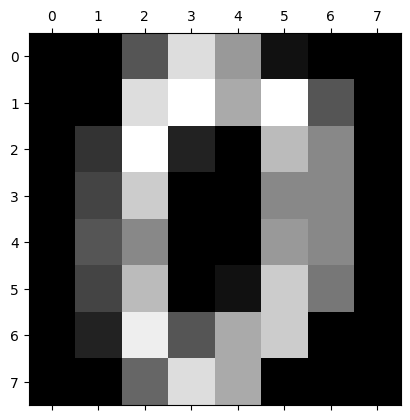

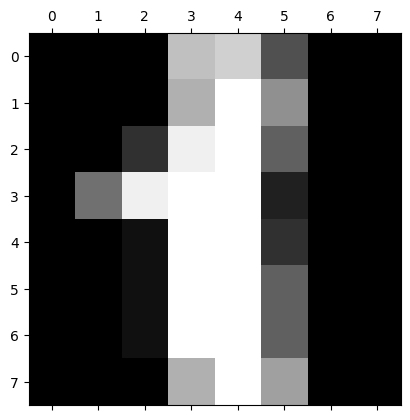

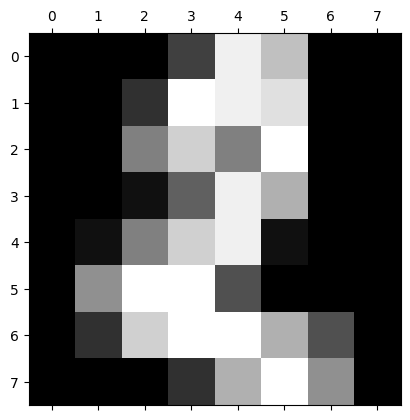

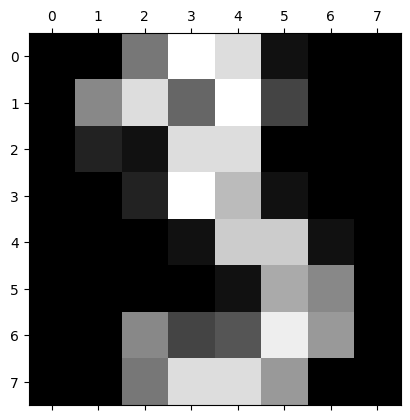

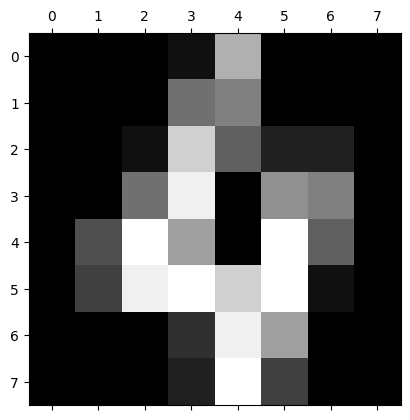

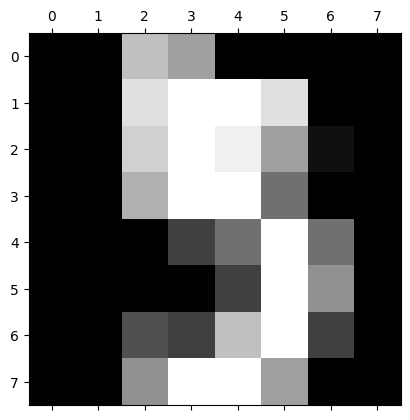

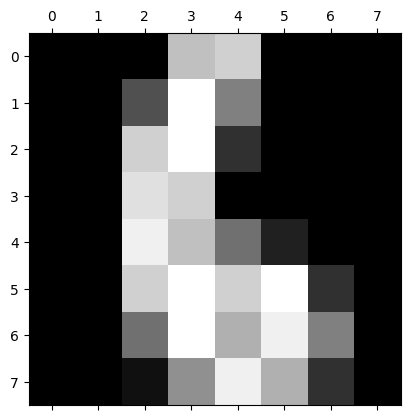

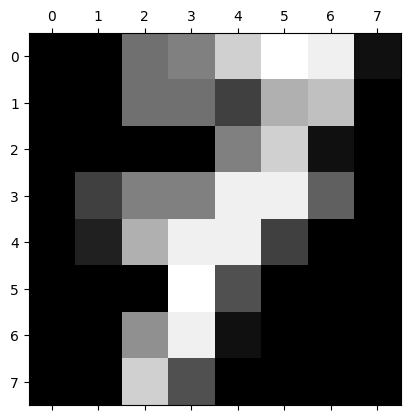

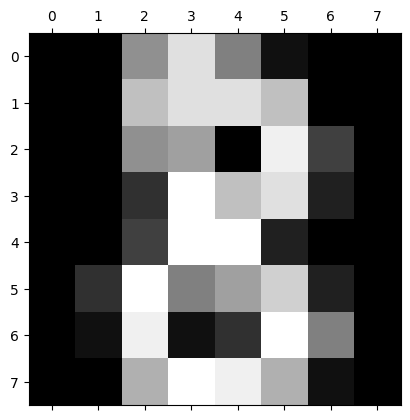

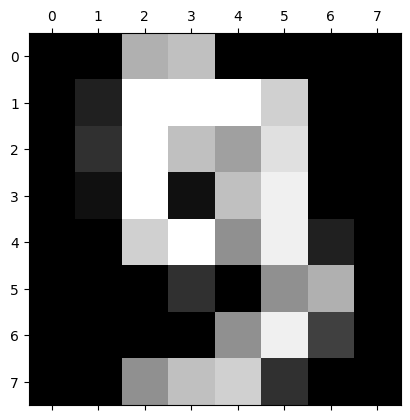

In [6]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [10]:
len(X_train)

1437

In [11]:
len(X_test)

360

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

c:\Users\MAHMUD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.score(X_test, y_test)

1.0

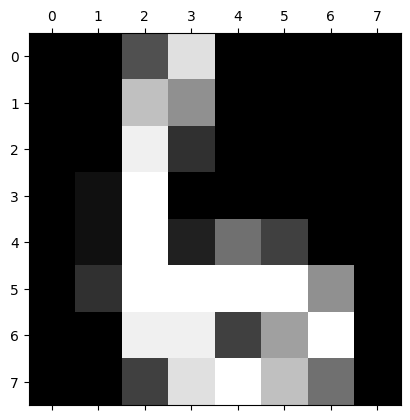

In [17]:
plt.matshow(digits.images[67])

In [18]:
digits.target[67]

np.int64(6)

In [19]:
model.predict(digits.data[67].reshape(1, -1))

array([6])

In [20]:
model.predict(digits.data[0:5])

array([0, 1, 1, 3, 4])

In [24]:
y_predicted = model.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]])

Text(95.72222222222221, 0.5, 'Truth')

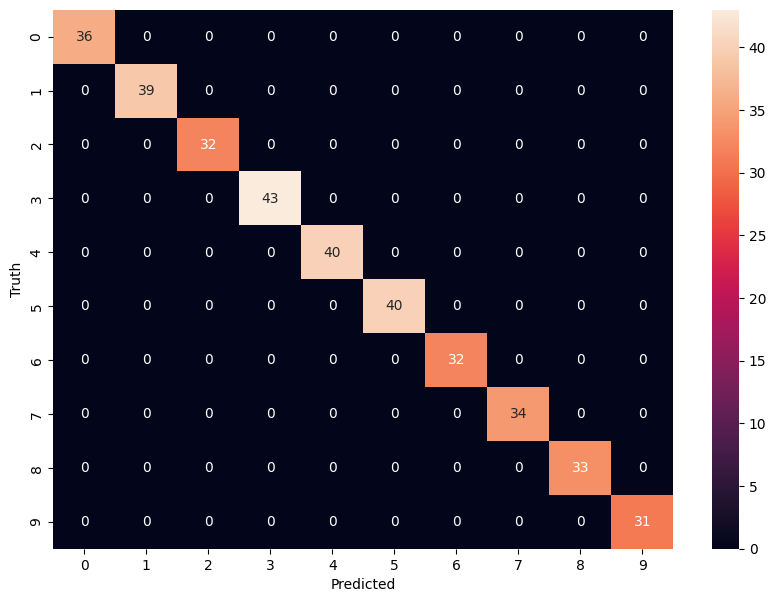

In [25]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Logistic Regression on Iris Dataset using scikit-learn

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = iris.target  # Target: 0=Setosa, 1=Versicolour, 2=Virginica
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)  # Increased max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [5]:
# Make predictions on the training set (for demonstration)
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.97


In [6]:
# Make predictions on the test set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 1.00


In [7]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
# Predict some new samples (example)
new_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Expected: Setosa
    [6.7, 3.0, 5.2, 2.3],  # Expected: Virginica
    [5.9, 2.8, 4.1, 1.3] ]  # Expected: Versicolour

In [10]:
new_predictions = model.predict(new_samples)
print("\nPredictions for new samples:")
for i, pred in enumerate(new_predictions):
    print(f"Sample {i+1}: Predicted - {target_names[pred]}")


Predictions for new samples:
Sample 1: Predicted - setosa
Sample 2: Predicted - virginica
Sample 3: Predicted - versicolor
